In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

Data Loading

In [2]:
dd=pd.read_csv('Reviews.csv')
dd.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Exploratory Data Analysis(EDA):

In [3]:
color=sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px 


In [ ]:
fig=px.histogram(dd,x='Score')
fig.update_traces(marker_color='turquoise',marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Scores of Products')
fig.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords=set(stopwords.words("english"))
stopwords.update(['br','href'])
textt=" ".join(review for review in dd.Text)
wordcloud=WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
dd['sentiment'] = dd['Score'].apply(lambda rating : +1 if rating >= 3 else 0)

In [7]:
positive=dd[dd['sentiment']==1]
negative=dd[dd['sentiment']==0]

In [ ]:
textp=" ".join(review for review in positive.Text)
wordcloud=WordCloud(stopwords=stopwords).generate(textp)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
textn=" ".join(review for review in negative.Text)
wordcloud=WordCloud(stopwords=stopwords).generate(textn)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
dd['sentimentt']=dd['sentiment'].replace({0: 'negative'})
dd['sentimentt']=dd['sentimentt'].replace({1: 'postive'})
fig=px.histogram(dd,x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

Pre-Processing

In [11]:
def remove_punctuation(text):
    result="".join(t for t in text if t not in("?",".",";",":","!",'"'))
    return result


In [14]:
stop=set(stopwords.words("english"))
stop.update(['br','href'])
def remove_stopwords(text):
    result=" ".join(t for t in text.split() if t not in stop)
    return result

In [15]:
from bs4 import BeautifulSoup
import re
def remove_tags(text):
    result= BeautifulSoup(text).get_text()
    result=re.sub(r"http\S+","",text)

In [16]:
def contractions(s):
 s = re.sub(r"won’t", "will not",s)
 s = re.sub(r"would’t", "would not",s)
 s = re.sub(r"could’t", "could not",s)
 s = re.sub(r"\’d", " would",s)
 s = re.sub(r"can\’t", "can not",s)
 s = re.sub(r"n\’t", " not", s)
 s= re.sub(r"\’re", " are", s)
 s = re.sub(r"\’s", " is", s)
 s = re.sub(r"\’ll", " will", s)
 s = re.sub(r"\’t", " not", s)
 s = re.sub(r"\’ve", " have", s)
 s = re.sub(r"\’m", " am", s)
 return s

In [17]:
from nltk.tokenize import word_tokenize
def remove_nonalpha(text):
    result=" ".join([re.sub('[^A-Za-z]+','',text) for text in nltk.word_tokenize(text)])
    return result

In [18]:
def remove_spaces(text):
    result=re.sub(' +',' ',text)
    return result

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatization(text):
    result=" ".join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text))
    return result


In [20]:
dd['Text']=dd['Text'].apply(remove_punctuation)
dd=dd.dropna(subset=['Summary'])
dd['Summary']=dd['Summary'].apply(remove_punctuation)

In [21]:
dd['Text']=dd['Text'].str.lower()
dd['Summary']=dd['Summary'].str.lower()


In [22]:
dd['Text']=dd['Text'].apply(remove_stopwords)
lemmatizer=WordNetLemmatizer()
def lemm(text):
    words=text.split()
    words=[lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dd['Text']=dd['Text'].apply(lemm)

Model Training and Fitting

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
Y=dd['sentiment']
X=dd[['Summary','Text']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (426320, 2) (426320,) Test:  ((142107, 2), (142107,))


In [25]:
vectorizer=CountVectorizer(token_pattern=r'\b\w+\b')
X_train=vectorizer.fit_transform(X_train['Summary'])
X_test=vectorizer.transform(X_test['Summary'])

Tf-Idf Feature Extraction

In [26]:
vectorizer= TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train['Text'])
X_test = vectorizer.transform(X_test['Text'])

SVM Model

In [27]:
from sklearn.svm import LinearSVC
clf=LinearSVC(random_state=0)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.9280753235238236


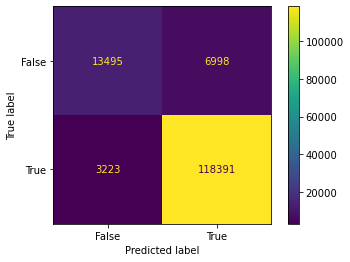

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,y_pred), display_labels = [False, True])

cm_display.plot()
plt.show()

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

In [31]:
print(accuracy_score(Y_test,y_pred))

0.9219742869809369


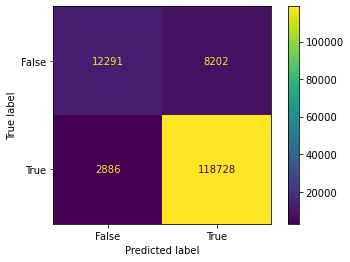

In [32]:

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test,y_pred), display_labels = [False, True])

cm_display.plot()
plt.show()

LSTM


In [33]:
text=dd.Text.values

In [34]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text)
vocab_size=len(tokenizer.word_index)+1
encoded_docs=tokenizer.texts_to_sequences(text)


In [36]:
padded_sequence=pad_sequences(encoded_docs,maxlen=200)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [38]:
embedding_vector_length=32
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           5287968   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 5,304,619
Trainable params: 5,304,619
Non-trainable params: 0
______________________________________________

In [39]:
Y=dd['sentiment']
X=padded_sequence
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=30)

In [40]:
model.fit(X_train,Y_train,validation_split=0.2, epochs=1, batch_size=100)

3411/3411 [==============================] - 1253s 365ms/step - loss: 0.2407 - accuracy: 0.9037 - val_loss: 0.2127 - val_accuracy: 0.9139


In [41]:
score,acc=model.evaluate(X_test,Y_test,verbose=2,batch_size=32)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % acc)

4441/4441 - 97s - loss: 0.2121 - accuracy: 0.9153 - 97s/epoch - 22ms/step
Score: 0.21
Validation Accuracy: 0.92
